In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic

In [2]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install sklearn

  Using cached sklearn-0.0.post5-py3-none-any.whl

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import PredictionErrorDisplay

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from tqdm import tqdm

import xgboost as xgb

In [5]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 1. Basic preprocessing

In [6]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('Y_train.csv')
test_data = pd.read_csv('X_test.csv')

In [7]:
train_data = pd.concat([X_train, y_train], axis=1)

In [8]:
train_data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),pH(pH:pH)
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,NaN,NaN,0.034045,0,NaN,0,1,1,1,6.4472
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,NaN,NaN,0.038702,0,NaN,0,1,1,1,6.4932
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,NaN,NaN,0.040240,0,NaN,0,1,1,1,6.5425
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,NaN,NaN,0.041149,0,NaN,0,1,1,1,6.5753
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,1.017800e-25,0.52808,0.041951,0,4.083,0,1,1,1,6.5825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,84.8,60,100,90,0.0000,63.673,56.5170,0.0001,100,1.1,...,NaN,NaN,1.602800,0,NaN,0,1,10,10,6.5118
10859,85.0,60,100,90,0.0000,59.470,52.5490,0.0001,100,1.1,...,NaN,NaN,1.605400,0,NaN,0,1,10,10,6.5159
10860,85.2,60,100,90,0.0000,53.645,49.6080,0.0001,100,1.1,...,NaN,NaN,1.607900,0,NaN,0,1,10,10,6.5142
10861,85.4,60,100,90,0.0000,48.495,47.5990,0.0001,100,1.1,...,NaN,NaN,1.610300,0,NaN,0,1,10,10,6.5091


In [9]:
(train_data.isna().sum() / len(train_data)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
Time (h),0.00%
Aeration rate(Fg:L/h),0.00%
Agitator RPM(RPM:RPM),0.00%
Sugar feed rate(Fs:L/h),0.00%
Acid flow rate(Fa:L/h),0.00%
Base flow rate(Fb:L/h),0.00%
Heating/cooling water flow rate(Fc:L/h),0.00%
Heating water flow rate(Fh:L/h),0.00%
Water for injection/dilution(Fw:L/h),0.00%
Air head pressure(pressure:bar),0.00%


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 35 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Time (h)                                                 10863 non-null  float64
 1   Aeration rate(Fg:L/h)                                    10863 non-null  int64  
 2   Agitator RPM(RPM:RPM)                                    10863 non-null  int64  
 3   Sugar feed rate(Fs:L/h)                                  10863 non-null  int64  
 4   Acid flow rate(Fa:L/h)                                   10863 non-null  float64
 5   Base flow rate(Fb:L/h)                                   10863 non-null  float64
 6   Heating/cooling water flow rate(Fc:L/h)                  10863 non-null  float64
 7   Heating water flow rate(Fh:L/h)                          10863 non-null  float64
 8   Water for injection/diluti

In [11]:
train_data.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),pH(pH:pH)
count,10863.000000,10863.000000,10863.0,10863.000000,10863.000000,10863.000000,10863.000000,10863.000000,10863.000000,10863.000000,...,1.960000e+02,196.000000,10863.000000,10863.0,196.000000,10863.0,10863.0,10863.000000,10863.000000,10863.000000
mean,114.400000,64.770782,100.0,76.044371,0.081529,62.878822,65.612985,20.768224,155.210347,0.943598,...,1.391955e+01,18.584110,1.233729,0.0,51.112683,0.0,1.0,5.202522,5.202522,6.490122
std,69.408765,11.581885,0.0,24.288204,0.571150,48.770576,81.662165,47.385995,158.353912,0.136530,...,1.009237e+01,7.095282,0.492685,0.0,24.420635,0.0,0.0,2.742467,2.742467,0.089450
min,0.200000,30.000000,100.0,8.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,1.017800e-25,0.487730,0.032293,0.0,4.080900,0.0,1.0,1.000000,1.000000,5.696000
25%,54.400000,60.000000,100.0,75.000000,0.000000,32.147500,12.469000,0.000100,0.000000,0.900000,...,4.523800e+00,16.558750,0.918440,0.0,30.186000,0.0,1.0,3.000000,3.000000,6.492900
50%,111.200000,65.000000,100.0,80.000000,0.000000,56.988000,35.455000,0.007151,100.000000,0.900000,...,1.392600e+01,20.842500,1.383700,0.0,51.466500,0.0,1.0,5.000000,5.000000,6.500900
75%,171.600000,75.000000,100.0,90.000000,0.000000,79.521500,93.319000,11.426500,250.000000,1.100000,...,2.219175e+01,23.627750,1.629900,0.0,72.603250,0.0,1.0,8.000000,8.000000,6.508600
max,278.000000,75.000000,100.0,150.000000,7.798800,225.000000,865.410000,652.170000,500.000000,1.100000,...,3.450200e+01,26.792000,1.953400,0.0,90.260000,0.0,1.0,10.000000,10.000000,6.700200


In [12]:
train_data=train_data.drop(columns = ['PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
                                'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
                                'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
                                'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
                                'Viscosity(Viscosity_offline:centPoise)'])

test_data=test_data.drop(columns = ['PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
                                'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
                                'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
                                'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
                                'Viscosity(Viscosity_offline:centPoise)'])


cols = train_data.columns.to_list()

## 2. Data Cleaning and Visualization

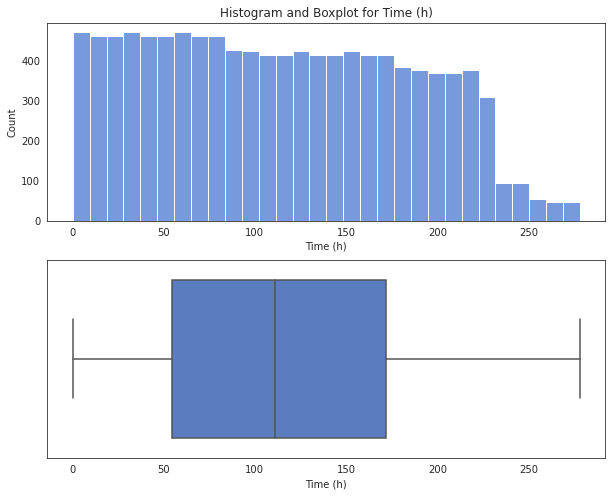

Skewness of the distribution: 0.156076
Kurtosis of the distribution: -1.071240



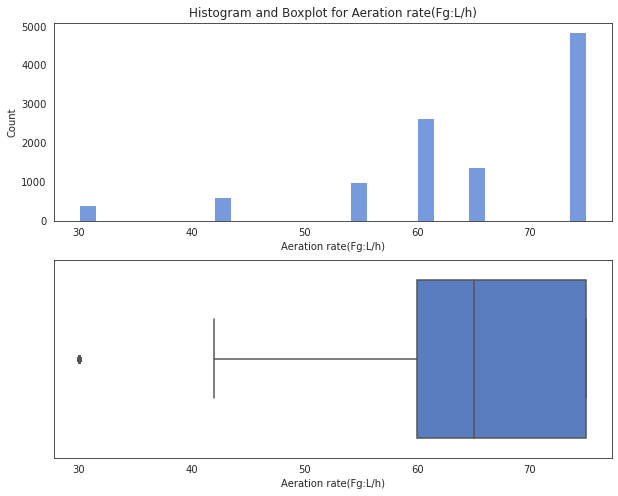

Skewness of the distribution: -1.181341
Kurtosis of the distribution: 1.143335



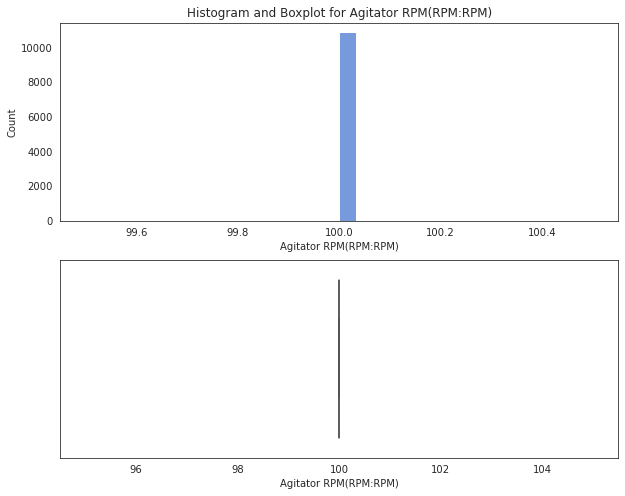

Skewness of the distribution: 0.000000
Kurtosis of the distribution: 0.000000



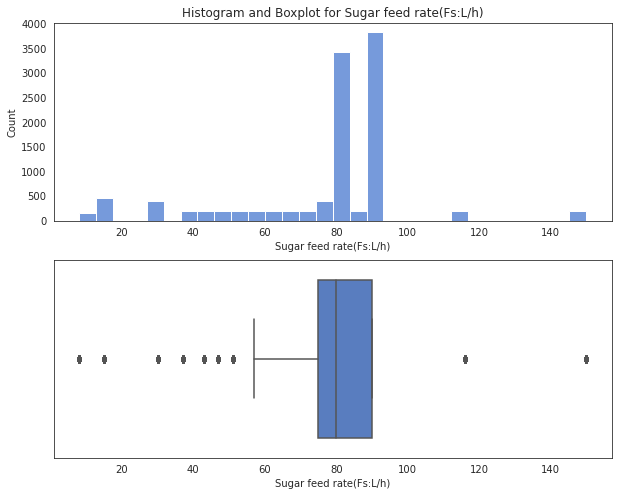

Skewness of the distribution: -0.731368
Kurtosis of the distribution: 1.992842



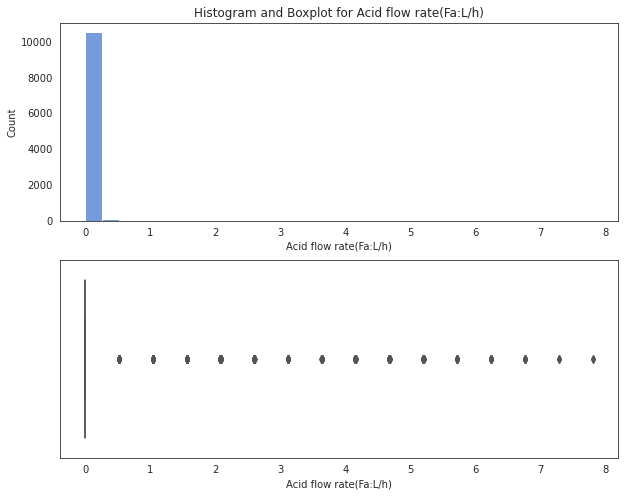

Skewness of the distribution: 8.589745
Kurtosis of the distribution: 80.273082



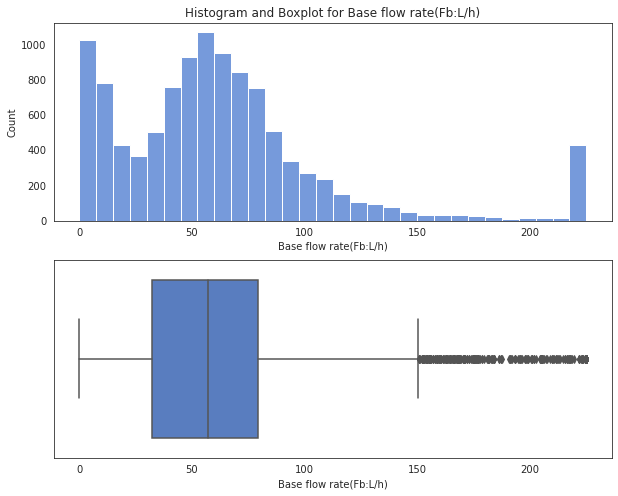

Skewness of the distribution: 1.533607
Kurtosis of the distribution: 3.021820



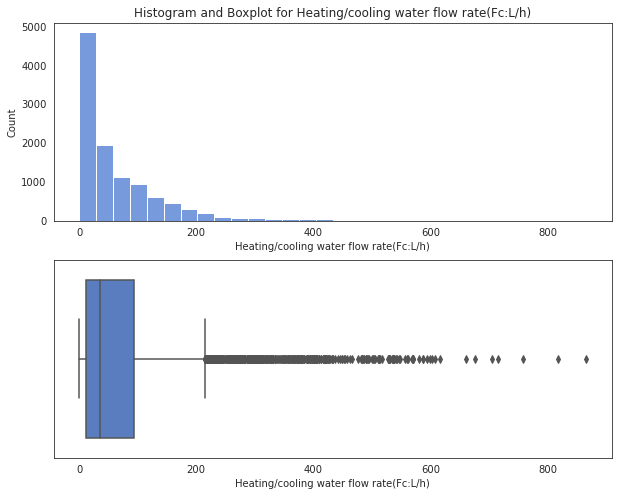

Skewness of the distribution: 2.669047
Kurtosis of the distribution: 10.649961



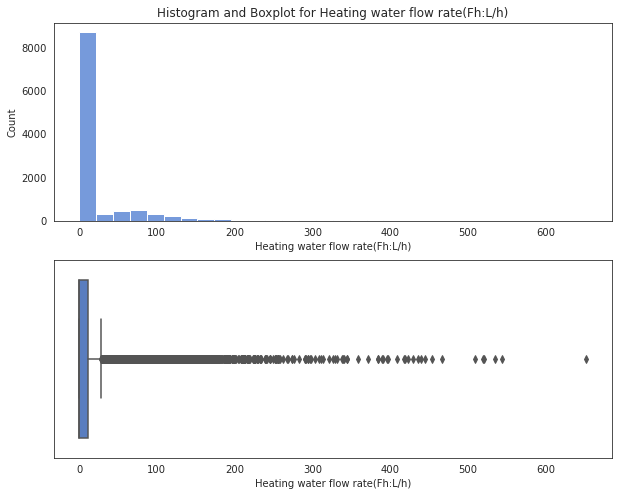

Skewness of the distribution: 3.838650
Kurtosis of the distribution: 22.347311



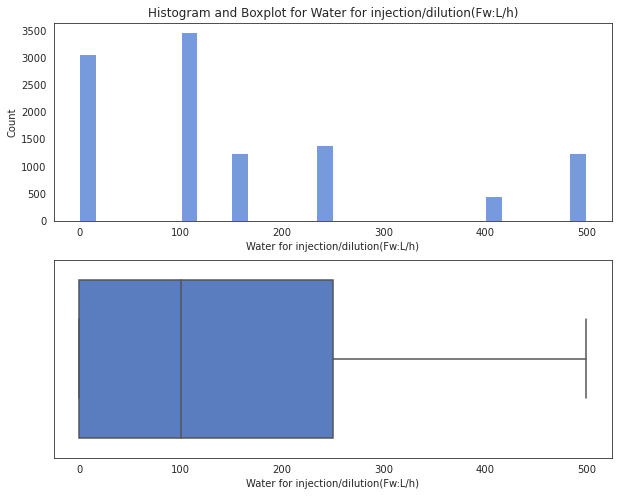

Skewness of the distribution: 1.089770
Kurtosis of the distribution: 0.105045



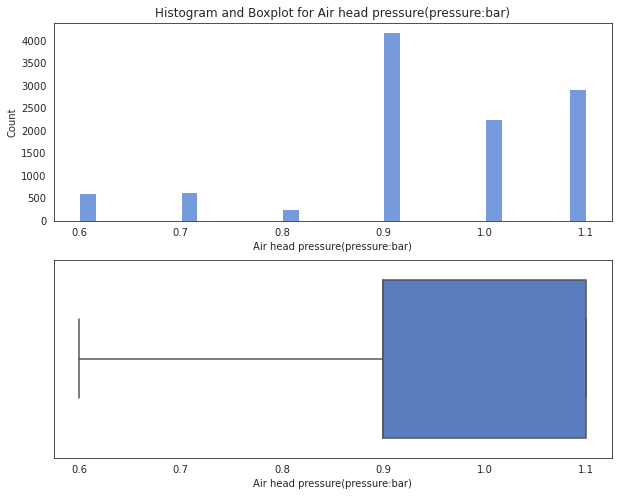

Skewness of the distribution: -0.858879
Kurtosis of the distribution: 0.380897



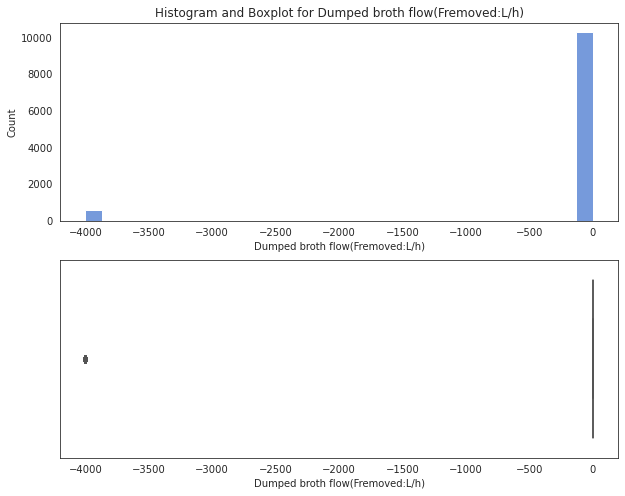

Skewness of the distribution: -3.973673
Kurtosis of the distribution: 13.792614



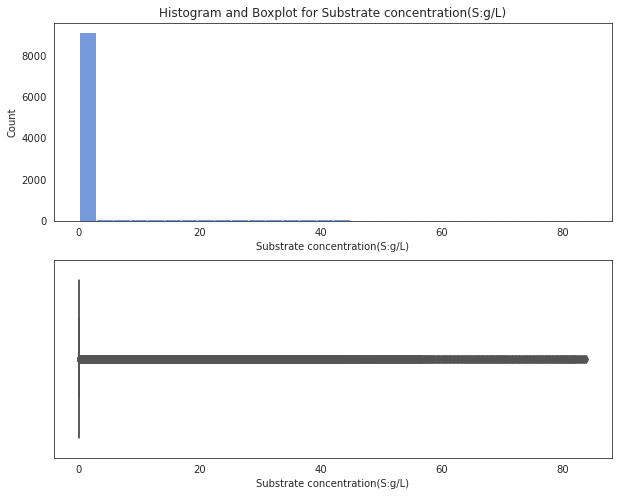

Skewness of the distribution: 3.192494
Kurtosis of the distribution: 10.244834



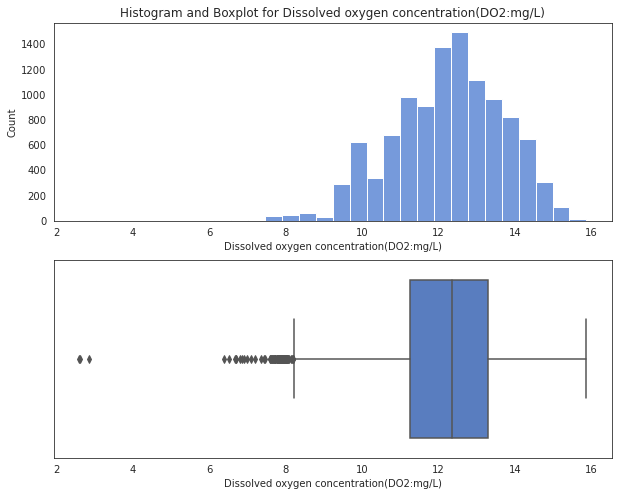

Skewness of the distribution: -0.460522
Kurtosis of the distribution: 0.379293



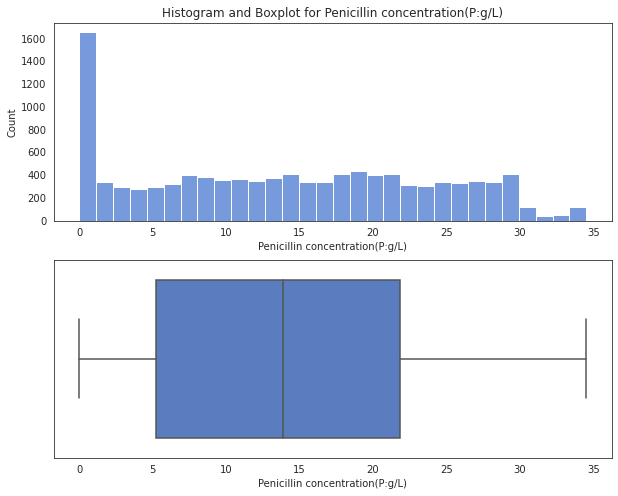

Skewness of the distribution: 0.097523
Kurtosis of the distribution: -1.168880



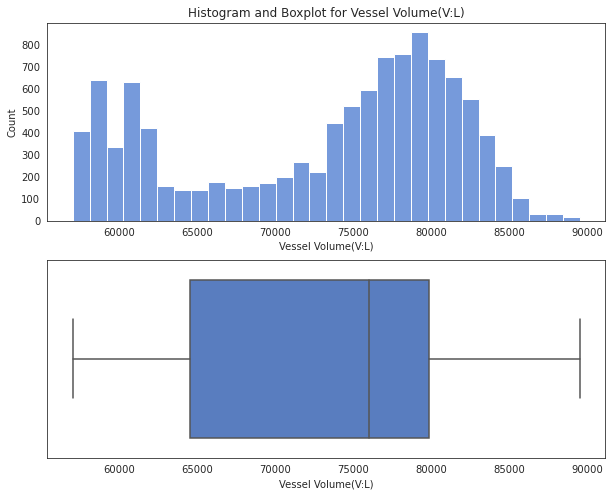

Skewness of the distribution: -0.518183
Kurtosis of the distribution: -1.114284



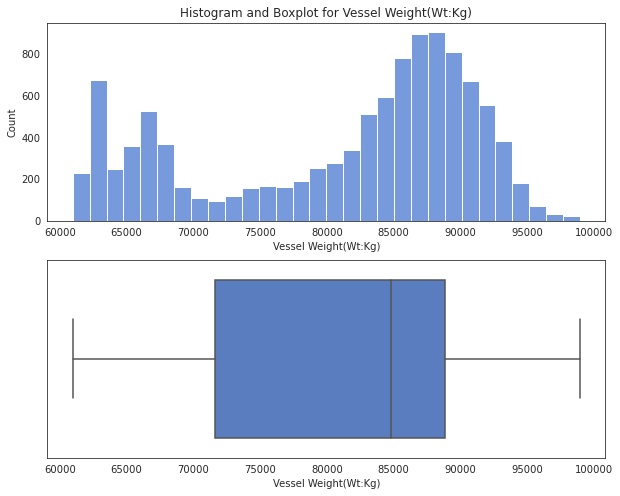

Skewness of the distribution: -0.631896
Kurtosis of the distribution: -1.002629



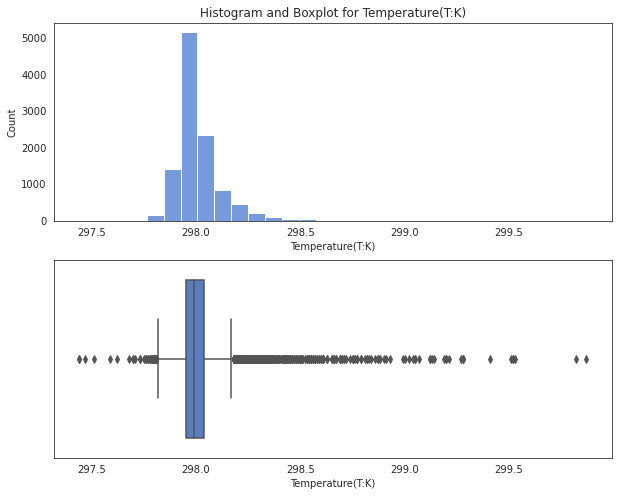

Skewness of the distribution: 3.780936
Kurtosis of the distribution: 29.072495



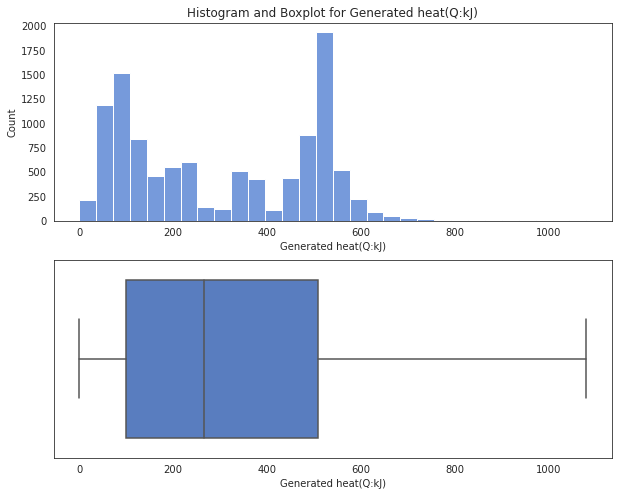

Skewness of the distribution: 0.117237
Kurtosis of the distribution: -1.490190



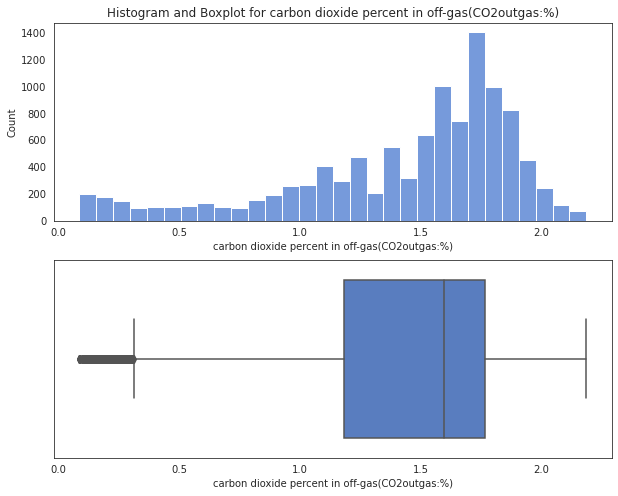

Skewness of the distribution: -1.131489
Kurtosis of the distribution: 0.544999



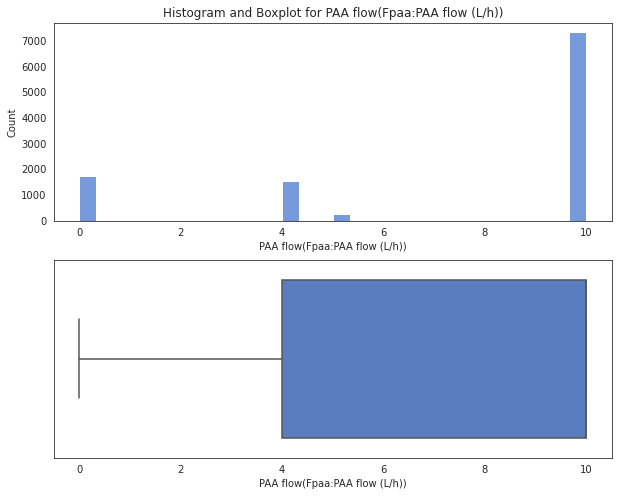

Skewness of the distribution: -1.024192
Kurtosis of the distribution: -0.650467



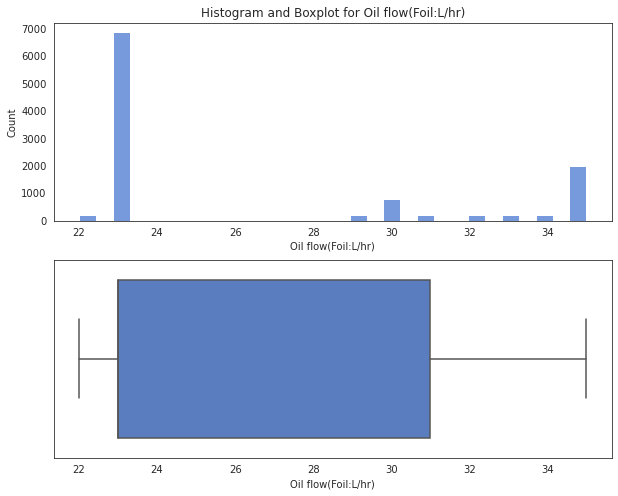

Skewness of the distribution: 0.823990
Kurtosis of the distribution: -1.132039



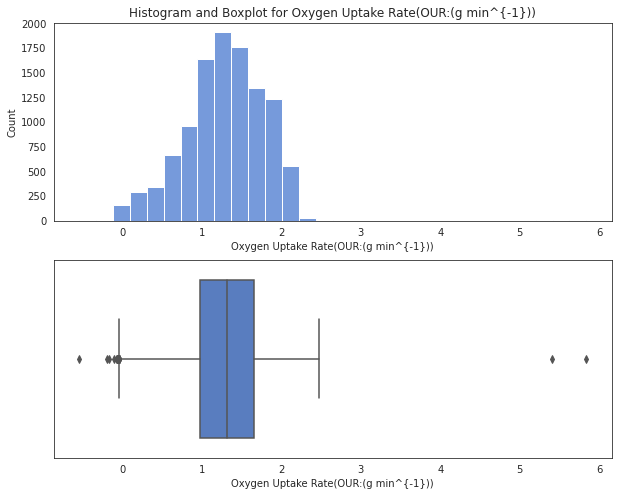

Skewness of the distribution: -0.273209
Kurtosis of the distribution: 0.850638



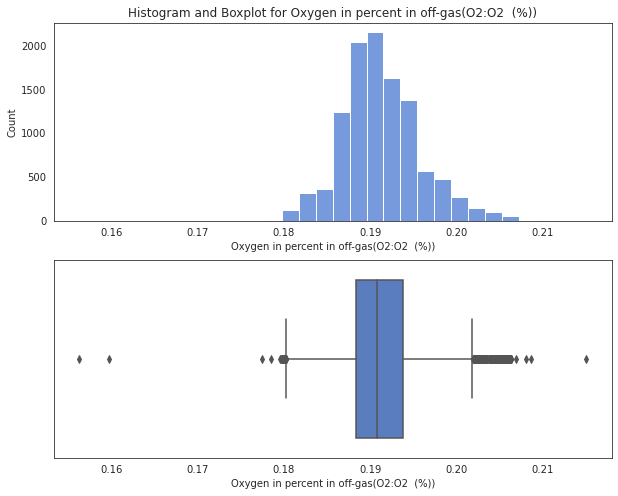

Skewness of the distribution: 0.410079
Kurtosis of the distribution: 1.165578



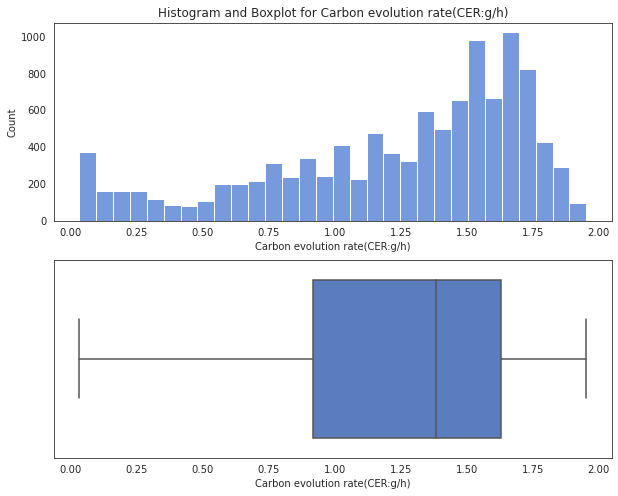

Skewness of the distribution: -0.877492
Kurtosis of the distribution: -0.196883



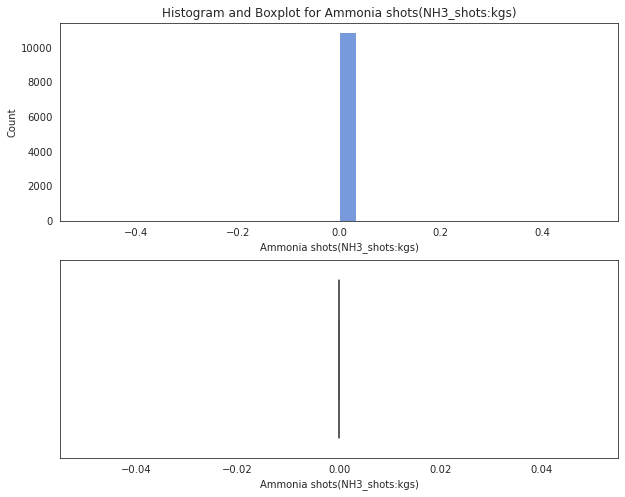

Skewness of the distribution: 0.000000
Kurtosis of the distribution: 0.000000



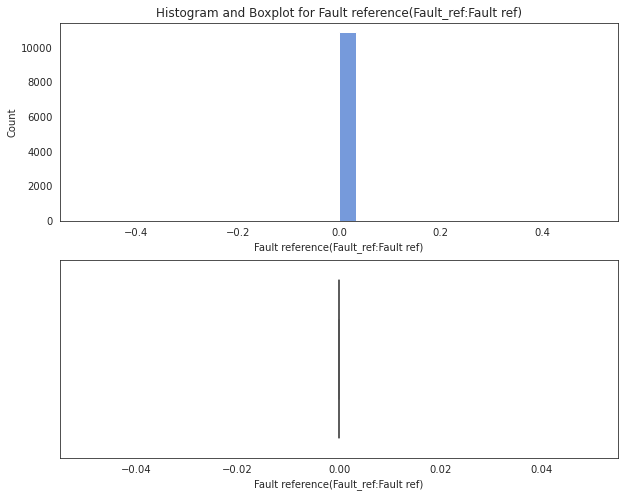

Skewness of the distribution: 0.000000
Kurtosis of the distribution: 0.000000



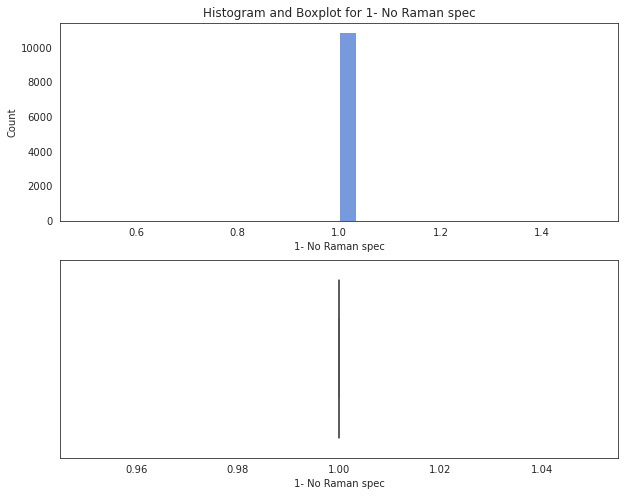

Skewness of the distribution: 0.000000
Kurtosis of the distribution: 0.000000



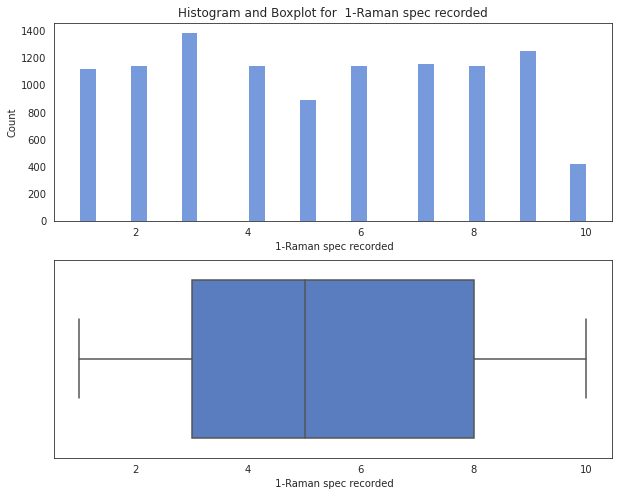

Skewness of the distribution: 0.045780
Kurtosis of the distribution: -1.241638



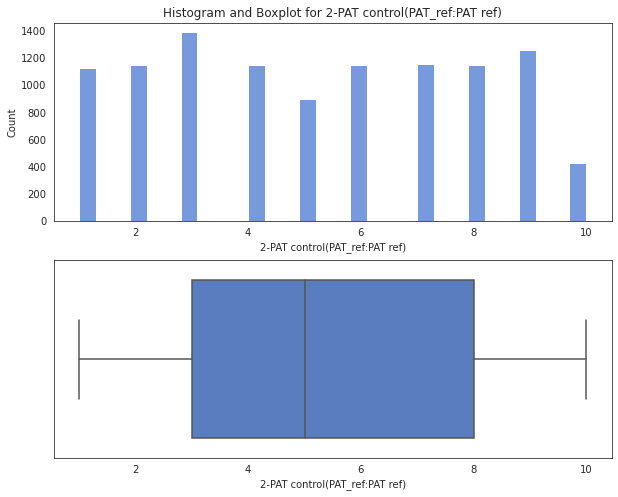

Skewness of the distribution: 0.045780
Kurtosis of the distribution: -1.241638



KeyError: 'pH(pH:pH)'

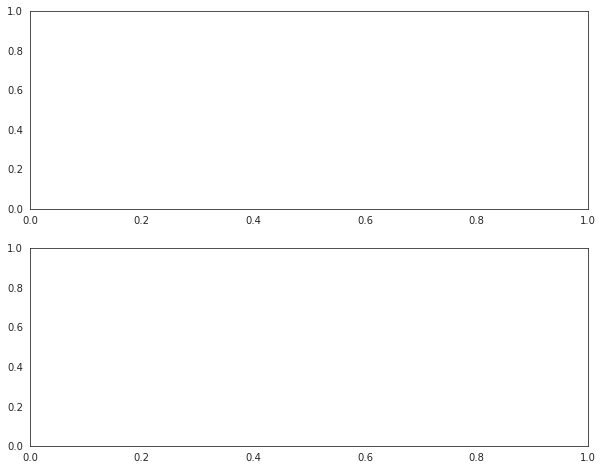

In [13]:
for column in cols:
        fig, axs = plt.subplots(2, figsize=(10, 8))

        # Фильтр для не нулевых значений
        #column_data = X_train[column][X_train[column] != 0]
        
        column_data = X_train[column]
        
        # Histogram plot
        axs[0].set_title(f'Histogram and Boxplot for {column}')
        sns.histplot(column_data, ax=axs[0], bins=30)

        # Box plot
        sns.boxplot(column_data, ax=axs[1])
        plt.show()
        print("Skewness of the distribution: %f" % column_data.skew())
        print("Kurtosis of the distribution: %f" % column_data.kurt())
        print()

In [16]:
outliers_remedy = pd.DataFrame(columns=cols)

for column in cols:
    column_data = train_data[column]
    iqr = scipy.stats.iqr(column_data)
    q1 = np.quantile(column_data, .25)
    q3 = np.quantile(column_data, .75)
    outliers_remedy[column] = [q1-3*iqr, q3+3*iqr]

outliers_remedy

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Oil flow(Foil:L/hr),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Fault reference(Fault_ref:Fault ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),pH(pH:pH)
0,-297.2,15.0,100.0,30.0,0.0,-109.9745,-230.081,-34.2791,-750.0,0.3,...,-1.0,-1.05871,0.17219,-1.21594,0.0,0.0,1.0,-12.0,-12.0,6.4458
1,523.2,120.0,100.0,135.0,0.0,221.6435,335.869,45.7057,1000.0,1.7,...,55.0,3.68757,0.20999,3.76428,0.0,0.0,1.0,23.0,23.0,6.5557


In [17]:
for column in cols:
    column_data = train_data[column]
    print(color.BOLD + column + color.END)
    print('Нижний (0.25) квантиль:', round(column_data.quantile(0.25),2))
    print('Средний (0.5) квантиль:', round(column_data.quantile(0.5),2))
    print('Верхний (0.75) квантиль:', round(column_data.quantile(0.75),2))
    print('0.9-ый квантиль:', round(column_data.quantile(0.9),2))
    print('0.97-ой квантиль:', round(column_data.quantile(0.97),2))
    print()

Time (h)
Нижний (0.25) квантиль: 54.4
Средний (0.5) квантиль: 111.2
Верхний (0.75) квантиль: 171.6
0.9-ый квантиль: 211.4
0.97-ой квантиль: 232.43

Aeration rate(Fg:L/h)
Нижний (0.25) квантиль: 60.0
Средний (0.5) квантиль: 65.0
Верхний (0.75) квантиль: 75.0
0.9-ый квантиль: 75.0
0.97-ой квантиль: 75.0

Agitator RPM(RPM:RPM)
Нижний (0.25) квантиль: 100.0
Средний (0.5) квантиль: 100.0
Верхний (0.75) квантиль: 100.0
0.9-ый квантиль: 100.0
0.97-ой квантиль: 100.0

Sugar feed rate(Fs:L/h)
Нижний (0.25) квантиль: 75.0
Средний (0.5) квантиль: 80.0
Верхний (0.75) квантиль: 90.0
0.9-ый квантиль: 90.0
0.97-ой квантиль: 116.0

Acid flow rate(Fa:L/h)
Нижний (0.25) квантиль: 0.0
Средний (0.5) квантиль: 0.0
Верхний (0.75) квантиль: 0.0
0.9-ый квантиль: 0.0
0.97-ой квантиль: 0.52

Base flow rate(Fb:L/h)
Нижний (0.25) квантиль: 32.15
Средний (0.5) квантиль: 56.99
Верхний (0.75) квантиль: 79.52
0.9-ый квантиль: 113.07
0.97-ой квантиль: 225.0

Heating/cooling water flow rate(Fc:L/h)
Нижний (0.25) кванти

In [18]:
train_data[train_data['Sugar feed rate(Fs:L/h)'] > 116]

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Oil flow(Foil:L/hr),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Fault reference(Fault_ref:Fault ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),pH(pH:pH)
100,20.2,55,100,150,0.0,49.305,139.32,0.0001,0,0.7,...,35,1.3617,0.19009,0.36603,0,0,1,1,1,6.4901
101,20.4,55,100,150,0.0,53.842,172.80,0.0001,0,0.7,...,35,1.4140,0.18954,0.36697,0,0,1,1,1,6.4707
102,20.6,55,100,150,0.0,66.062,197.05,0.0001,0,0.7,...,35,1.4435,0.18921,0.37348,0,0,1,1,1,6.4605
103,20.8,55,100,150,0.0,82.370,217.27,0.0001,0,0.7,...,35,1.4553,0.18907,0.38038,0,0,1,1,1,6.4575
104,21.0,55,100,150,0.0,99.876,222.57,0.0001,0,0.7,...,35,1.4750,0.18884,0.38735,0,0,1,1,1,6.4567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,23.2,55,100,150,0.0,225.000,359.42,0.0001,0,0.7,...,35,1.9784,0.18321,0.50145,0,0,1,10,10,6.4074
10551,23.4,55,100,150,0.0,225.000,351.57,0.0001,0,0.7,...,35,2.0015,0.18294,0.51027,0,0,1,10,10,6.4070
10552,23.6,55,100,150,0.0,225.000,356.00,0.0001,0,0.7,...,35,2.0106,0.18282,0.51914,0,0,1,10,10,6.4067
10553,23.8,55,100,150,0.0,225.000,364.90,0.0001,0,0.7,...,35,2.0458,0.18242,0.52807,0,0,1,10,10,6.4060


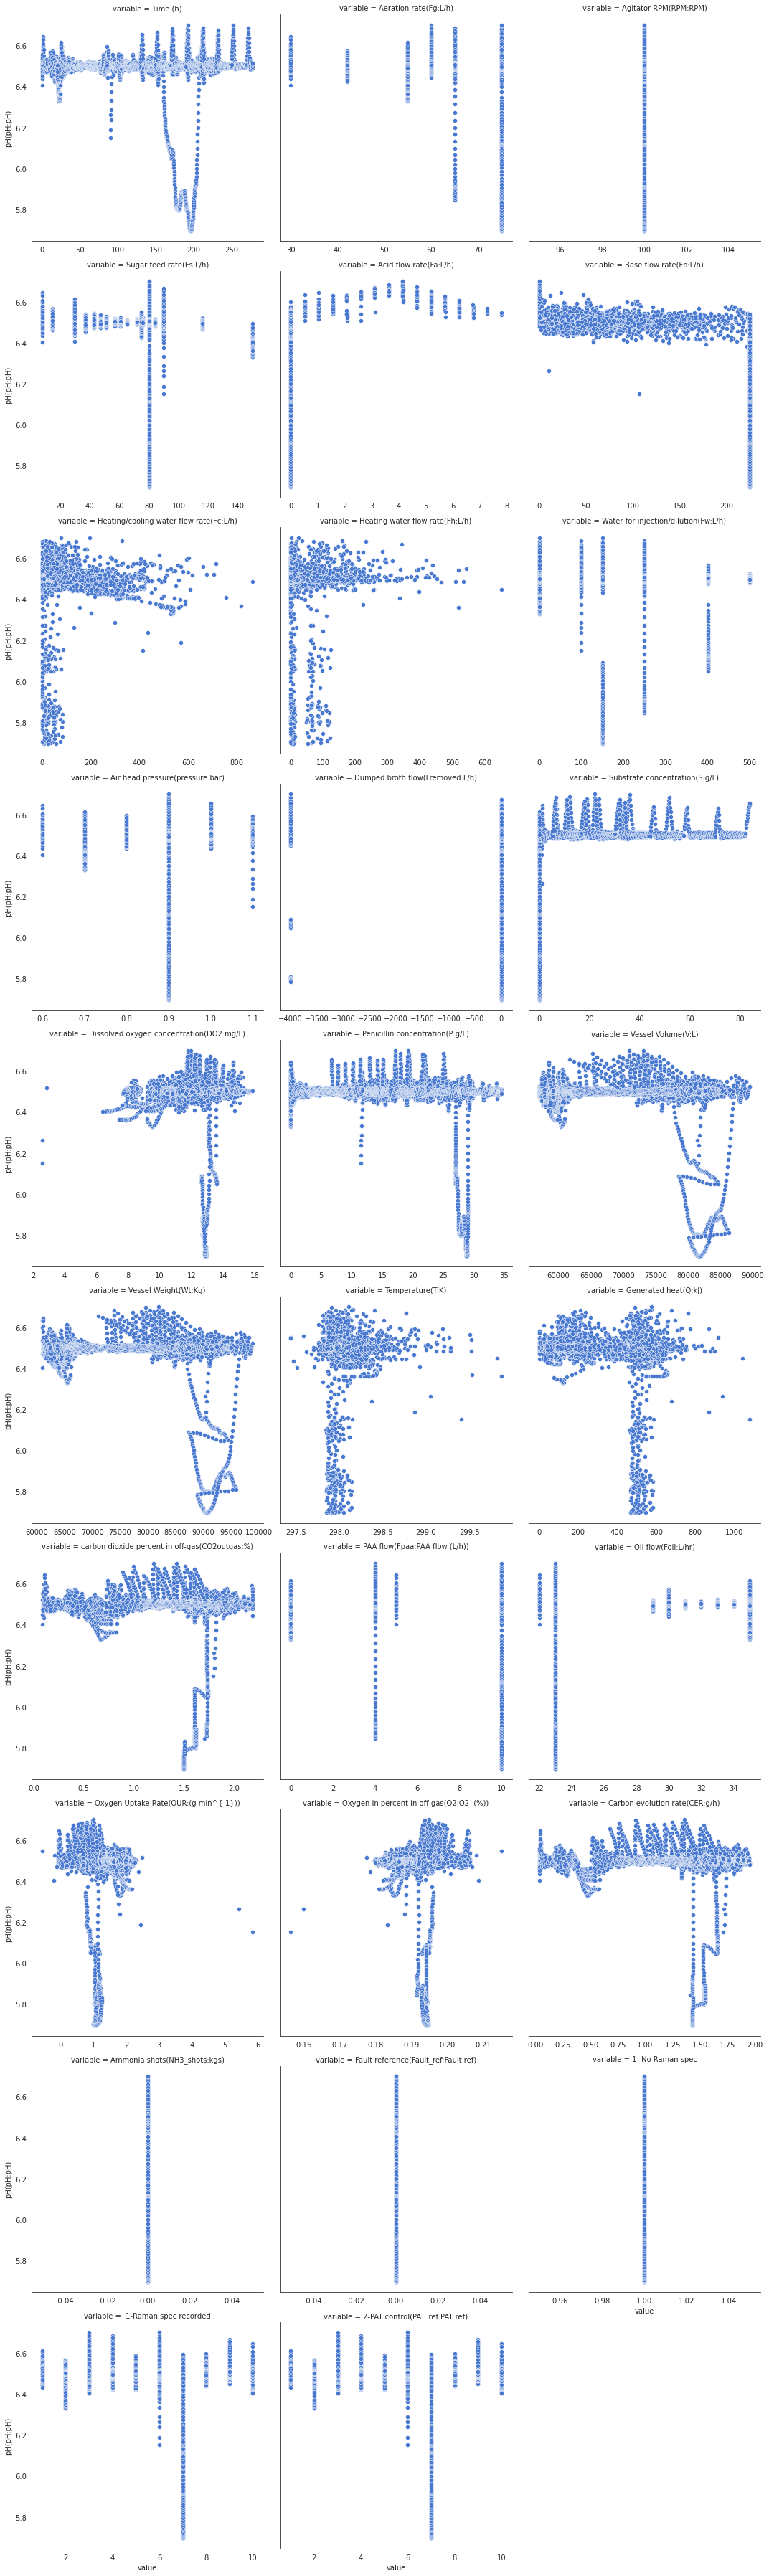

In [19]:
sns.relplot(data=train_data.melt(id_vars=['pH(pH:pH)']),
            x='value', y='pH(pH:pH)', col='variable', col_wrap=3, 
            facet_kws=dict(sharex=False)
           )

In [20]:
# удаление
train_data=train_data.drop(columns = ['Agitator RPM(RPM:RPM)', 
                                'Ammonia shots(NH3_shots:kgs)', 
                                'Fault reference(Fault_ref:Fault ref)', 
                                '1- No Raman spec'])
test_data=test_data.drop(columns = ['Agitator RPM(RPM:RPM)', 
                                    'Ammonia shots(NH3_shots:kgs)', 
                                    'Fault reference(Fault_ref:Fault ref)', 
                                    '1- No Raman spec'])

<AxesSubplot:xlabel='pH(pH:pH)', ylabel='Count'>

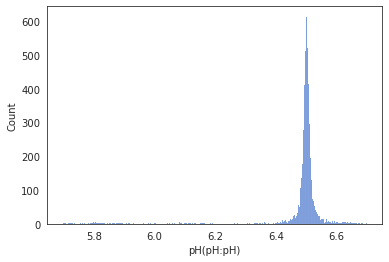

In [21]:
sns.histplot(data = train_data, x = 'pH(pH:pH)')

## Модель

In [22]:
# Creating baseline model which predicts 6.5 always
class BaselineModel:
    def __init__(self, constant):
        self.constant = constant
        
    def predict(self, X):
        return np.full(X.shape[0], self.constant)
baseline = BaselineModel(6.5)
y_pred = baseline.predict(X_train)
print (f'LR MAPE test = ', mean_absolute_percentage_error(y_true=y_train, y_pred=y_pred))

LR MAPE test =  0.004239109764264365


In [23]:
X, y = train_data[train_data.columns[:-1]], train_data[train_data.columns[-1]]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 4, shuffle=False)

## PCA

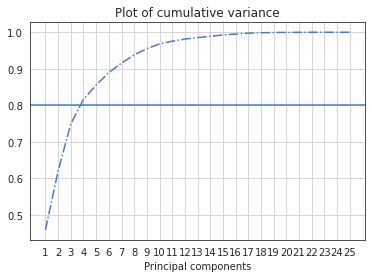

In [25]:
# посмотрим, какое количество гланых компонент использовать в пайплайне

X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

# к новому датасету создадим названия признаков
X_train_scaled.columns = X_train.columns.values
X_train_scaled.index = X_train.index

def var_plot(x, label, h=0):
    plt.plot(range(len(x)), x, linestyle="-.")
    plt.title('Plot of '+ label + ' variance')
    plt.xticks(range(len(x)), [y+1 for y in range(len(x))])
    plt.xlabel('Principal components')
    plt.axhline(h)
    plt.grid()
    plt.show()

pca = PCA(n_components=None).fit(X_train_scaled)

# кумулятивная дисерсия, трешхолд = 80%
cumulVarExplained = np.cumsum(pca.explained_variance_ratio_)
cumulVarExplained

var_plot(cumulVarExplained, "cumulative", h=0.8)

In [26]:
pip install sklearn_pandas

  Using cached sklearn_pandas-2.2.0-py2.py3-none-any.whl (10 kB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install sklearn.metrics

ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import PredictionErrorDisplay

ImportError: cannot import name 'PredictionErrorDisplay' from 'sklearn.metrics' (/opt/conda/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

In [29]:
mapper = DataFrameMapper([([feature], SimpleImputer()) for feature in X_train.columns.tolist()]) #+\
                        
                         
                         #([feature], IsolationForest()) for feature in X_train.columns.tolist())
                         #[([feature], OneHotEncoder(handle_unknown = 'ignore')) for feature in nominal_features],
                             #df_out=True)

                    
#preprocessor = ColumnTransformer(transformers=[('simpleimputer', SimpleImputer()),
                                               #('num', StandardScaler())])
                                               #('outlier', IsolationForest(contamination=0.05))])
                    
pipeline = Pipeline(steps = [('preprocessing', mapper), 
                             ('scaler', MinMaxScaler()),
                             ('pca', PCA(n_components=3)),
                             ('xgb', xgb.XGBRegressor(objective="reg:linear", random_state=42,
                                                      n_estimators = 500, eta = 0.4, max_depth = 6))])
        
                             #('lr', LinearRegression())])
                             #('dtr', DecisionTreeRegressor(random_state=41))])

    
pipeline

Pipeline(steps=[('preprocessing',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['Time (h)'], SimpleImputer()),
                                           (['Aeration rate(Fg:L/h)'],
                                            SimpleImputer()),
                                           (['Sugar feed rate(Fs:L/h)'],
                                            SimpleImputer()),
                                           (['Acid flow rate(Fa:L/h)'],
                                            SimpleImputer()),
                                           (['Base flow rate(Fb:L/h)'],
                                            SimpleImputer()),
                                           (['Heating/cooling water flow '
                                             'rate(Fc:L/h)'],
                                            SimpleImputer()),
                                           (['Heating wate...
                              eval_metric=None

In [30]:
%%time
params_grid = dict(n_estimators = [400, 500, 600], eta = [0.3, 0.4, 0.5], max_depth = [5, 6, 7])

results = []

for params in tqdm(ParameterGrid(params_grid)):
    
    pipeline = Pipeline(steps = [('preprocessing', mapper), 
                                 ('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2)),
                                 ('xgb', xgb.XGBRegressor(objective="reg:linear", random_state=42,
                                                          n_estimators = params['n_estimators'],
                                                          eta = params['eta'],
                                                          max_depth = params['max_depth']))])

    
    
    pipeline.fit(X_train, y_train)
    
    pipe_preds_train = pipeline.predict(X_train)
    pipe_preds_test = pipeline.predict(X_test)
    
    results.append(dict(
        
        params=params,
        
        train_rmse = mean_squared_error(y_true=y_train, y_pred = pipe_preds_train, squared=False),
        test_rmse = mean_squared_error(y_true=y_test, y_pred = pipe_preds_test, squared=False),
        
        train_mape = mean_absolute_percentage_error(y_true=y_train, y_pred=pipe_preds_train),
        test_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=pipe_preds_test)
        
    ))
results


  0%|          | 0/27 [00:00<?, ?it/s]

[10:33:43] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


  4%|▎         | 1/27 [00:01<00:27,  1.07s/it]

[10:33:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


  7%|▋         | 2/27 [00:02<00:28,  1.15s/it]

[10:33:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 11%|█         | 3/27 [00:03<00:30,  1.27s/it]

[10:33:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 15%|█▍        | 4/27 [00:04<00:28,  1.24s/it]

[10:33:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 19%|█▊        | 5/27 [00:06<00:28,  1.30s/it]

[10:33:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 22%|██▏       | 6/27 [00:07<00:28,  1.37s/it]

[10:33:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 26%|██▌       | 7/27 [00:09<00:26,  1.35s/it]

[10:33:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 30%|██▉       | 8/27 [00:10<00:25,  1.36s/it]

[10:33:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 33%|███▎      | 9/27 [00:11<00:24,  1.37s/it]

[10:33:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 37%|███▋      | 10/27 [00:12<00:21,  1.29s/it]

[10:33:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 41%|████      | 11/27 [00:14<00:20,  1.26s/it]

[10:33:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 44%|████▍     | 12/27 [00:15<00:19,  1.28s/it]

[10:33:59] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 48%|████▊     | 13/27 [00:16<00:17,  1.25s/it]

[10:34:00] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 52%|█████▏    | 14/27 [00:18<00:16,  1.30s/it]

[10:34:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 56%|█████▌    | 15/27 [00:19<00:16,  1.36s/it]

[10:34:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 59%|█████▉    | 16/27 [00:20<00:14,  1.31s/it]

[10:34:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 63%|██████▎   | 17/27 [00:22<00:13,  1.31s/it]

[10:34:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 67%|██████▋   | 18/27 [00:23<00:12,  1.33s/it]

[10:34:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 70%|███████   | 19/27 [00:24<00:10,  1.26s/it]

[10:34:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 74%|███████▍  | 20/27 [00:25<00:08,  1.25s/it]

[10:34:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 78%|███████▊  | 21/27 [00:27<00:07,  1.29s/it]

[10:34:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 81%|████████▏ | 22/27 [00:28<00:06,  1.26s/it]

[10:34:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 85%|████████▌ | 23/27 [00:29<00:05,  1.28s/it]

[10:34:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 89%|████████▉ | 24/27 [00:30<00:03,  1.28s/it]

[10:34:14] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 93%|█████████▎| 25/27 [00:32<00:02,  1.26s/it]

[10:34:15] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


 96%|█████████▋| 26/27 [00:33<00:01,  1.24s/it]

[10:34:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 27/27 [00:34<00:00,  1.28s/it]

CPU times: user 1min 17s, sys: 26.1 s, total: 1min 43s
Wall time: 34.6 s


[{'params': {'eta': 0.3, 'max_depth': 5, 'n_estimators': 400},
  'train_rmse': 0.0090686416086707,
  'test_rmse': 0.1650579552201687,
  'train_mape': 0.0009438512724226906,
  'test_mape': 0.010581088869012406},
 {'params': {'eta': 0.3, 'max_depth': 5, 'n_estimators': 500},
  'train_rmse': 0.007694037904108603,
  'test_rmse': 0.1653138870180539,
  'train_mape': 0.000821166008330558,
  'test_mape': 0.010654173190549792},
 {'params': {'eta': 0.3, 'max_depth': 5, 'n_estimators': 600},
  'train_rmse': 0.006800657263934827,
  'test_rmse': 0.1653522301762198,
  'train_mape': 0.0007272918931822603,
  'test_mape': 0.010686503526302078},
 {'params': {'eta': 0.3, 'max_depth': 6, 'n_estimators': 400},
  'train_rmse': 0.006735090930741832,
  'test_rmse': 0.1665753569799733,
  'train_mape': 0.0007021521351487838,
  'test_mape': 0.010967546095539536},
 {'params': {'eta': 0.3, 'max_depth': 6, 'n_estimators': 500},
  'train_rmse': 0.0055550653834316056,
  'test_rmse': 0.16678861716462312,
  'train_mape

In [31]:
results = pd.DataFrame(results)
results.sort_values('test_mape', ascending=False).style.bar(vmin=0, vmax=1)

,params,train_rmse,test_rmse,train_mape,test_mape
5,"{'eta': 0.3, 'max_depth': 6, 'n_estimators': 600}",0.004712,0.167029,0.000503,0.011120
14,"{'eta': 0.4, 'max_depth': 6, 'n_estimators': 600}",0.003782,0.165607,0.000407,0.011064
13,"{'eta': 0.4, 'max_depth': 6, 'n_estimators': 500}",0.004099,0.165604,0.000438,0.011060
4,"{'eta': 0.3, 'max_depth': 6, 'n_estimators': 500}",0.005555,0.166789,0.000588,0.011049
12,"{'eta': 0.4, 'max_depth': 6, 'n_estimators': 400}",0.005116,0.165356,0.000547,0.011032
23,"{'eta': 0.5, 'max_depth': 6, 'n_estimators': 600}",0.003366,0.164233,0.000361,0.011002
22,"{'eta': 0.5, 'max_depth': 6, 'n_estimators': 500}",0.003366,0.164233,0.000361,0.011002
11,"{'eta': 0.4, 'max_depth': 5, 'n_estimators': 600}",0.005341,0.166645,0.000577,0.010980
10,"{'eta': 0.4, 'max_depth': 5, 'n_estimators': 500}",0.006189,0.166581,0.000667,0.010968
3,"{'eta': 0.3, 'max_depth': 6, 'n_estimators': 400}",0.006735,0.166575,0.000702,0.010968


In [32]:
%%time
pipeline.fit(X_train, y_train)

[10:34:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2.47 s, sys: 525 ms, total: 3 s
Wall time: 975 ms


Pipeline(steps=[('preprocessing',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['Time (h)'], SimpleImputer()),
                                           (['Aeration rate(Fg:L/h)'],
                                            SimpleImputer()),
                                           (['Sugar feed rate(Fs:L/h)'],
                                            SimpleImputer()),
                                           (['Acid flow rate(Fa:L/h)'],
                                            SimpleImputer()),
                                           (['Base flow rate(Fb:L/h)'],
                                            SimpleImputer()),
                                           (['Heating/cooling water flow '
                                             'rate(Fc:L/h)'],
                                            SimpleImputer()),
                                           (['Heating wate...
                              eval_metric=None

## 4.1. Оценка модели на Traina выборке. Evaluation on the Train Sample

In [33]:
lr_train_pred = pipeline.predict(X_train)
lr_rmse = mean_squared_error(y_true=y_train, y_pred = lr_train_pred, squared=False)
lr_mape = mean_absolute_percentage_error(y_true=y_train, y_pred=lr_train_pred)

print (f'LR RMSE train = {round(lr_rmse, 3)}')
print (f'LR MAPE train = {lr_mape}')
print (f'LR SCORE = {round(pipeline.score(X_train, y_train), 3)}')

LR RMSE train = 0.003
LR MAPE train = 0.00034602906550059836
LR SCORE = 0.986


In [34]:
PredictionErrorDisplay.from_predictions(
    y_train,
    lr_train_pred,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
)
plt.show()

NameError: name 'PredictionErrorDisplay' is not defined

## 4.2. Оценка на Тестовой Выборке. Evaluation on the Test Sample

In [ ]:
lr_test_pred = pipeline.predict(X_test)
lr_rmse = mean_squared_error(y_true=y_test, y_pred = lr_test_pred, squared=False)
lr_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=lr_test_pred)

print (f'LR RMSE test = {round(lr_rmse, 3)}')
print (f'LR MAPE test = {lr_mape}')
print (f'LR SCORE = {round(pipeline.score(X_test, y_test), 3)}')

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_test,
    lr_test_pred,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
)
plt.show()